In [32]:
import pandas as pd
data = pd.read_csv("/Users/ziyuewang/Desktop/Inference Analytics/mtsamples.csv")

In [33]:
data.drop(columns=["Unnamed: 0"],inplace = True)

In [34]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [35]:
from nltk.corpus import stopwords
import nltk as nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
ps = nltk.wordnet.WordNetLemmatizer()
def pre_process(text):
    
    if type(text)!=str:
        text = ""
    #remove all urls andand hashtags
    # actually rarely happen
    text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',text)
    
    #remove new_lines
    text = re.sub(r'(?:\n)',' ',text)
    
    # remove hashtags
    text = re.sub(r'#(?=\w+)','',text)

    # replace all number bullet points uses ('1.', '2.', etc)
    text = re.sub('\d+. ', ' ', text)
    
    # remove special characters
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    text = text.lower()
    
    text = text.split()
    text = [ps.lemmatize(word) for word in text if not word in stopwords]
    
    text = " ".join(text)

    return text

[nltk_data] Downloading package punkt to /Users/ziyuewang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziyuewang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
data.transcription = data.transcription.apply(pre_process)

In [37]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective year old white female present compl...,"allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stair...,"bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc today pleasan...,"bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mode left atrial enlargement left atrial diame...,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,left ventricular cavity size wall thickness ap...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [38]:
data.medical_specialty.unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [65]:
data.medical_specialty = data.medical_specialty.map(lambda x: x.strip().split(" / "))

In [66]:
data.medical_specialty

0             [Allergy, Immunology]
1                      [Bariatrics]
2                      [Bariatrics]
3       [Cardiovascular, Pulmonary]
4       [Cardiovascular, Pulmonary]
                   ...             
4994          [Allergy, Immunology]
4995          [Allergy, Immunology]
4996          [Allergy, Immunology]
4997          [Allergy, Immunology]
4998          [Allergy, Immunology]
Name: medical_specialty, Length: 4999, dtype: object

In [40]:
X,y = data["transcription"],data["medical_specialty"]

In [41]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [42]:
X_embedding = model.encode(X.values)

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_label = le.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_embedding, y_label, test_size=0.3, random_state=42)

### SVC

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC()

In [49]:
clf = svc.fit(x_train,y_train)

In [50]:
y_pred = clf.predict(x_test)

In [51]:
from sklearn import metrics

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3


### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)

In [59]:
clf = knn.fit(x_train, y_train)

In [60]:
y_pred = clf.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.29333333333333333


### multi-labels

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
import seaborn as sns
import json
import nltk
import re
import csv
from tqdm import tqdm

In [67]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,"[Allergy, Immunology]",Allergic Rhinitis,subjective year old white female present compl...,"allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,[Bariatrics],Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stair...,"bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,[Bariatrics],Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc today pleasan...,"bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,"[Cardiovascular, Pulmonary]",2-D Echocardiogram - 1,mode left atrial enlargement left atrial diame...,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,"[Cardiovascular, Pulmonary]",2-D Echocardiogram - 2,left ventricular cavity size wall thickness ap...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [84]:
data= data[["transcription","medical_specialty"]]

In [85]:
data

,transcription,medical_specialty
0,subjective year old white female present compl...,"[Allergy, Immunology]"
1,past medical history difficulty climbing stair...,[Bariatrics]
2,history present illness seen abc today pleasan...,[Bariatrics]
3,mode left atrial enlargement left atrial diame...,"[Cardiovascular, Pulmonary]"
4,left ventricular cavity size wall thickness ap...,"[Cardiovascular, Pulmonary]"
...,...,...
4994,history pleasure meeting evaluating patient re...,"[Allergy, Immunology]"
4995,admitting diagnosis kawasaki disease discharge...,"[Allergy, Immunology]"
4996,subjective year old white female come today co...,"[Allergy, Immunology]"
4997,chief complaint year old male present child ho...,"[Allergy, Immunology]"


In [71]:
sum(data_analysis.medical_specialty.str.len()==0)

0

In [76]:
specialities = data['medical_specialty'].explode().unique()

In [77]:
len(specialities)

47

In [78]:
all_specialities = nltk.FreqDist(specialities)
all_specialities_df = pd.DataFrame({"Specialty": list(all_specialities.keys()),
                             "Count": list(all_specialities.values())})

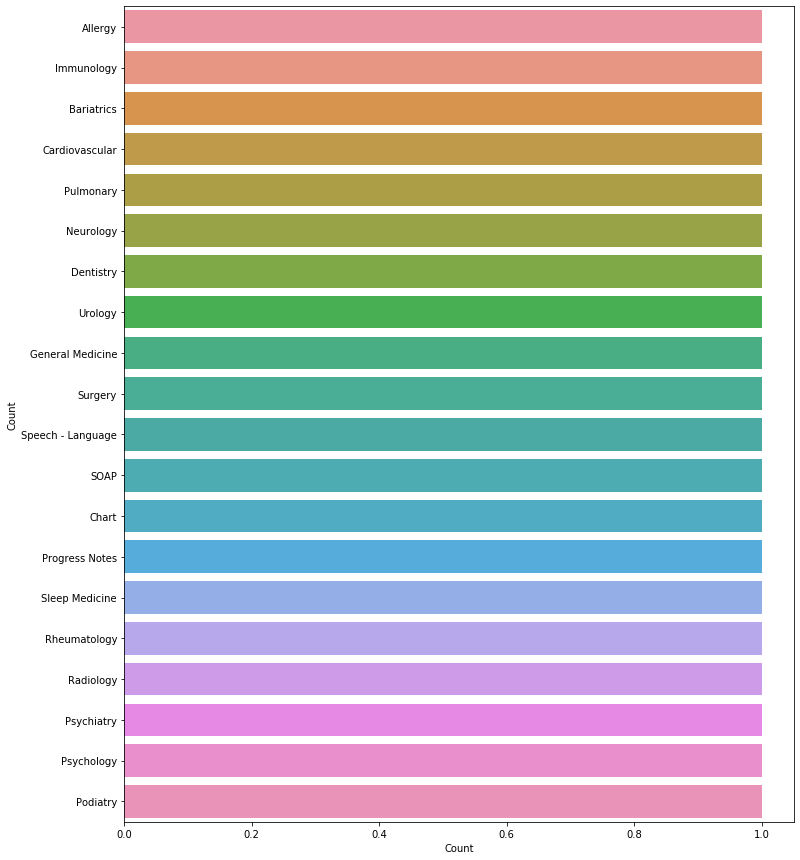

In [83]:
g = all_specialities_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Specialty") 
ax.set(ylabel = 'Count') 
plt.show()

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['medical_specialty'])

# transform target variable
y = multilabel_binarizer.transform(data['medical_specialty'])

In [150]:
x_train, x_test, y_train, y_test = train_test_split(X_embedding, y, test_size=0.3, random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [158]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [159]:
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [160]:
y_pred = clf.predict(x_test)

In [176]:
multilabel_binarizer.inverse_transform(y_pred)[0]

('Surgery',)

In [169]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="micro")

0.17771763644564728

In [177]:
y_pred_prob = clf.predict_proba(x_test)

In [196]:
t = 0.1
y_pred_new = (y_pred_prob >= t).astype(int)

In [197]:
f1_score(y_test, y_pred_new, average="micro")

0.4720342002137513